In [1]:
pip install tensorflow 

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl (385.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [63]:
# Cell 1: Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [64]:
# Cell 2: Data Preprocessing
# Define paths to your dataset
train_dir = r'C:\Users\Dell\Desktop\fake_logo\train'
validation_dir = r'C:\Users\Dell\Desktop\fake_logo\validation'

In [65]:
# Image data generator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [66]:
# Image data generator for validation (without augmentation)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [67]:
# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 10 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


In [68]:
# Cell 3: Building the Model
# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [69]:
# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [70]:
# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

In [71]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [72]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
# Cell 4: Training the Model
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 0.7275 - val_accuracy: 0.6667 - val_loss: 0.6607
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.5377 - val_accuracy: 0.6667 - val_loss: 0.7627
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.4854 - val_accuracy: 0.6667 - val_loss: 0.7928
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.5546 - val_accuracy: 0.6667 - val_loss: 0.7565
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.5899 - val_accuracy: 0.6667 - val_loss: 0.6753
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.4262 - val_accuracy: 0.6667 - val_loss: 0.5741
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.2971 - val_accuracy: 0.6667 - val_loss: 0.4804
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9000 - loss: 0.2796 - val_accuracy: 0.6667 - val_loss: 0.4098
Epoch 9/10
1/1

In [74]:
# Cell 5: Evaluating the Model
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step - accuracy: 1.0000 - loss: 0.3371
Validation Accuracy: 100.00%


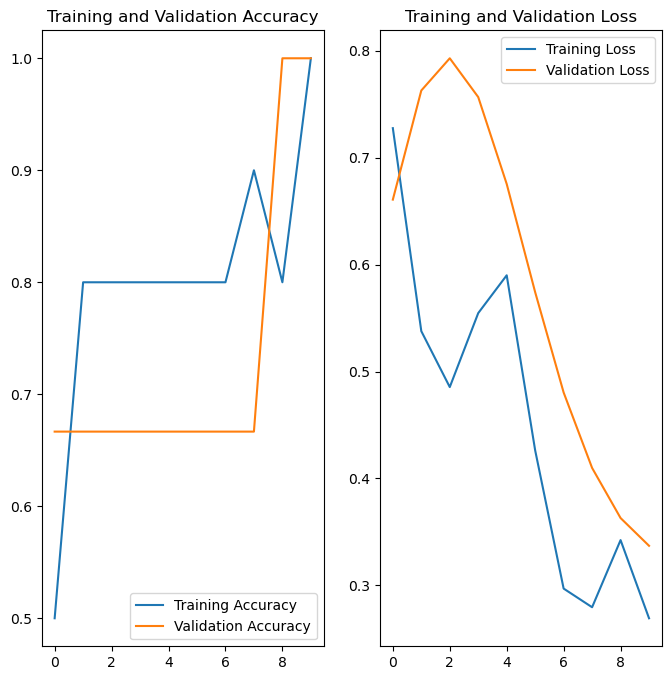

In [75]:
# Plotting training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
# Cell 6: Saving the Model
# Save the model
model.save('fake_logo_detector_1.keras')

In [84]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = load_model('fake_logo_detector_1.keras')

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(150, 150))
    # Convert the image to array
    img_array = img_to_array(img)
    # Expand dimensions to match the input shape (1, 150, 150, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image array
    img_array /= 255.0
    return img_array

# Function to predict if a logo is real or fake
def predict_logo(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    # Make prediction
    prediction = model.predict(img_array)
    # Convert prediction to class label
    if prediction[0][0] > 0.6:
        return "Real"
    else:
        return "Fake"

# Test the prediction function with a new image
image_path = r"C:\Users\Dell\Desktop\fake_logo\validation\real\scal_000004.jpg"# Change this to your test image path
result = predict_logo(image_path)
print(f'The logo is predicted to be: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 962ms/step
The logo is predicted to be: Real


In [85]:
#Manually Check the Directory: 
print(f"Checking file path: {image_path}")

Checking file path: C:\Users\Dell\Desktop\fake_logo\validation\real\scal_000004.jpg


In [49]:
# for multiple images 

import os
from glob import glob

# Function to predict logos in a directory
def predict_logos_in_directory(directory_path):
    image_paths = glob(os.path.join(directory_path, '*.jpg'))  # Change the extension if needed
    results = {}
    for image_path in image_paths:
        result = predict_logo(image_path)
        results[image_path] = result
    return results

# Directory containing the test images
test_directory = r"C:\Users\Dell\Desktop\fake_logo\train\real"

# Get predictions for all images in the directory
predictions = predict_logos_in_directory(test_directory)

# Print the results
for image_path, result in predictions.items():
    print(f"{os.path.basename(image_path)}: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
000001.jpg: Real
000002.jpg: Real
000003.jpg: Real
000004.jpg: Real
000005.jpg: Real
scal_000001.jpg: Real
scal_000002.jpg: Real
scal_000003.jpg: Real
scal_000004.jpg: Real
scal_000005.jpg: Real
